In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
# ACS98: installed scikit-learn into mdsine2 conda env

[DEBUG] Using default logger (stdout, stderr).


# McNulty et al., 2013

In [2]:
output_dir = Path('mcnulty-results')

In [3]:
# mcnulty = md2.dataset.parse(name='mcnulty', \
#                             metadata='mcnulty-datasets/metadata_2.tsv', \
#                             taxonomy='mcnulty-datasets/taxonomy.tsv', \
#                             reads='mcnulty-datasets/reads.tsv', \
#                             qpcr='mcnulty-datasets/dna_yields_2.tsv', \
#                             perturbations='mcnulty-datasets/perturbations.tsv', sep='\t')
mcnulty = md2.dataset.parse(name='mcnulty', \
                            metadata='mcnulty-datasets/metadata_2.tsv', \
                            taxonomy='mcnulty-datasets/taxonomy.tsv', \
                            reads='mcnulty-datasets/reads.tsv', \
                            qpcr='mcnulty-datasets/dna_yields_2.tsv', sep='\t')

[INFO] TaxaSet parsng new taxonomy table. Resetting


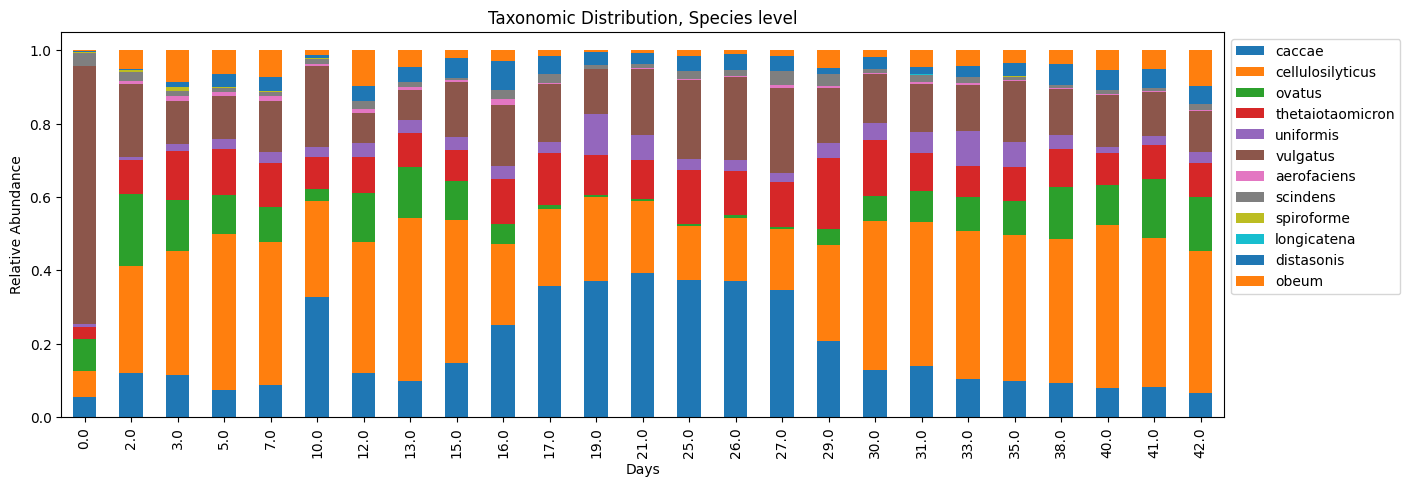

In [4]:
# Plot the taxa abundances at the phylum level for subject `1`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(mcnulty['1'], taxlevel='species', label_formatter='%(species)s', ax=ax)
plt.show()

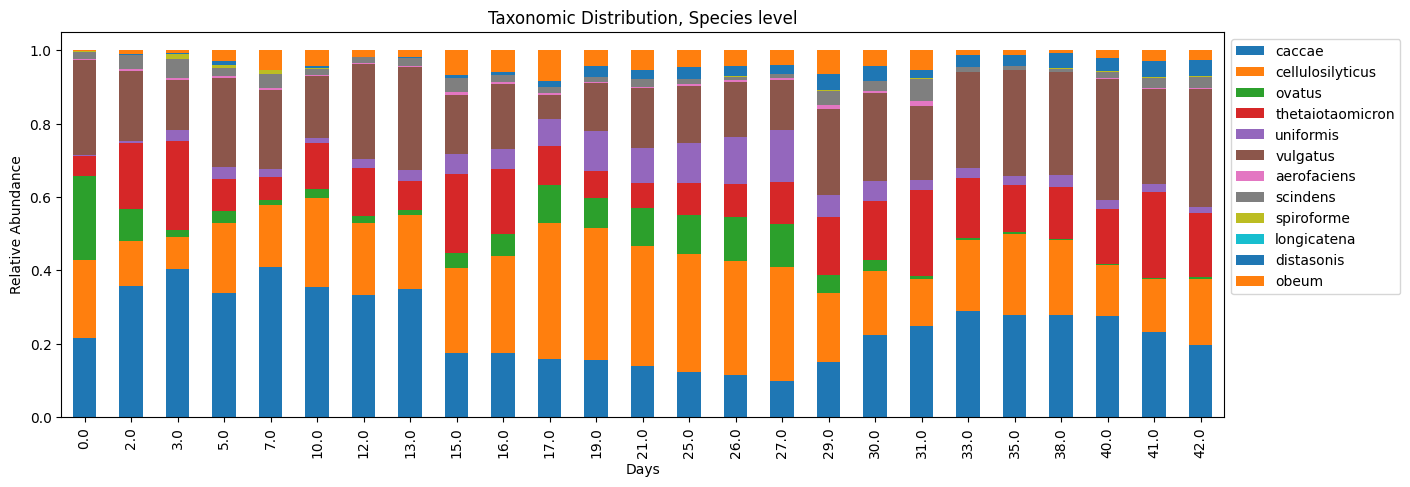

In [5]:
# Plot the taxa abundances at the phylum level for subject `9`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(mcnulty['9'], taxlevel='species', label_formatter='%(species)s', ax=ax)
plt.show()

In [6]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, 
    basepath=str(output_dir / "negbin"))

In [7]:
mcmc_negbin = md2.negbin.build_graph(
    params=params, 
    graph_name=mcnulty.name, 
    subjset=mcnulty)

[DEBUG] Available subjects: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
[DEBUG] Subject 1, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG] Subject 2, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG] Subject 3, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG] Subject 4, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG] Subject 5, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG] Subject 6, available qpcr: 0.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0
[DEBUG

In [8]:
mcmc_negbin = md2.negbin.run_graph(
    mcmc_negbin, 
    crash_if_error=True)

 49%|████▉     | 98/200 [00:03<00:03, 30.84it/s][DEBUG] Inference iteration 100/200, time: 3.6247687339782715
[DEBUG] Negative binomial dispersion a0: Value: 3.0757943781010164e-11, Acceptance rate: 1.0
[DEBUG] Negative binomial dispersion a1: Value: 0.4713323903192922, Acceptance rate: 0.44
[DEBUG] Filtering: no-mp : Time: 0.0311, Acc: [0.333, 0.333, 0.417, 0.417, 0.583, 0.250, 0.500, 0.417, 0.333, 0.417, 0.417, 0.500, 0.500, 0.417, 0.250], data/sec: 5780.51
100%|██████████| 200/200 [00:06<00:00, 29.31it/s]
[INFO] Inference total time: 0.03416120648384094/Gibb step
[INFO] remove local traces


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

IndexError: list index out of range

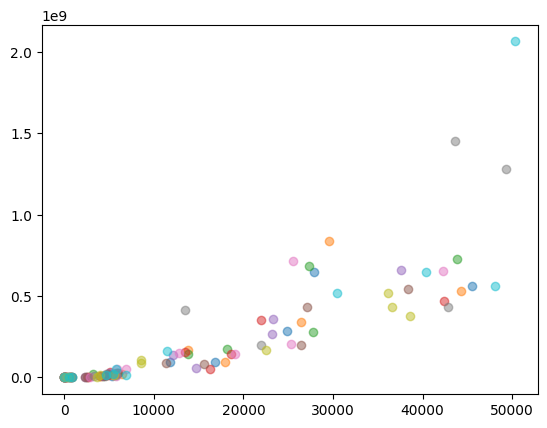

In [9]:
fig = md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin)
fig.tight_layout()
plt.show()

In [10]:
print('a0', md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0]))
print('a1', md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1]))

a0 {'median': 1.0614422313213866e-10, 'mean': 9.649921275593189e-11, '25th percentile': 8.01261913430375e-11, '75th percentile': 1.2261719504853749e-10}
a1 {'median': 0.6384946319960594, 'mean': 0.6116496564022738, '25th percentile': 0.5716425092209058, '75th percentile': 0.6564685373930714}


In [11]:
# Get a0 and a1 from negbin (get the mean of the posterior) and fixes them for inference
a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

print('negbin a0', a0)
print('negbin a1', a1)

negbin a0 9.649921275593189e-11
negbin a1 0.6116496564022738


In [12]:
basepath = output_dir / "mdsine2"
basepath.mkdir(exist_ok=True, parents=True)

In [13]:
# Initialize parameters of the model (Seed = 0) burnin=50, total steps=100
params = md2.config.MDSINE2ModelConfig(
    basepath=str(basepath), 
    seed=0,
    burnin=50, 
    n_samples=100, 
    negbin_a0=a0, negbin_a1=a1, 
    checkpoint=50
)

In [14]:
# The default number of modules is 30, which is larger than the number of taxa
# that we have in this dataset, which would throw a flag.
params.INITIALIZATION_KWARGS[STRNAMES.CLUSTERING]['value_option'] = 'no-clusters'

In [15]:
# initilize the graph
mcmc = md2.initialize_graph(params=params, graph_name=mcnulty.name, subjset=mcnulty)

[INFO] max_value found: 474883682321.9597, scaling_factor: 2.1057788195847589e-10
[INFO] Normalizing abundances for a max value of 100. Normalization constant: 2.1058E-10
[INFO] There are 375 qPCR measurements for 3 buckets. Each bucket is 125 measurements long
[INFO] Initializing Filtering
[INFO] Setting up the essential timepoints
[INFO] Essential timepoints: [ 0.  2.  3.  5.  7. 10. 12. 13. 15. 16. 17. 19. 21. 25. 26. 27. 29. 30.
 31. 33. 35. 38. 40. 41. 42.]
[INFO] Initializing Zero inflation


[WARNING] `zero_inflation_transition_policy` is None so we are not doing anything


[INFO] Initializing LHS vector
[INFO] Initializing growth design matrix
[INFO] Initializing self-interactions design matrix
[INFO] Initializing Clustering concentration parameter
[INFO] Cluster Concentration initialization results:
	prior shape: 1e-05
	prior scale: 100000.0
	value: 1.0
[INFO] Initializing Clustering parameter
[INFO] Cluster Assingments initialization results:
Clustering object (contains ability to change the cluster assignments), n_clusters: 12
Cluster 100112
	members: ['B_caccae']
	size: 1
Cluster 100113
	members: ['B_cellulosilyticus_WH2']
	size: 1
Cluster 100114
	members: ['B_ovatus']
	size: 1
Cluster 100115
	members: ['B_thetaiotaomicron']
	size: 1
Cluster 100116
	members: ['B_uniformis']
	size: 1
Cluster 100117
	members: ['B_vulgatus']
	size: 1
Cluster 100118
	members: ['C_aerofaciens']
	size: 1
Cluster 100119
	members: ['C_scindens']
	size: 1
Cluster 100120
	members: ['C_spiroforme']
	size: 1
Cluster 100121
	members: ['D_longicatena']
	size: 1
Cluster 100122
	mem

In [16]:
# Perform inference
mcmc = md2.run_graph(mcmc, crash_if_error=True)

100%|██████████| 100/100 [00:20<00:00,  4.84it/s]
[INFO] Inference total time: 0.20685275316238402/Gibb step
[INFO] remove local traces
[INFO] Denormalizing the parameters
